### Analysis to study the trend in the most offensive crime against women "Rape" and predictions to alert the authorities.
1) State wise trend in rape cases.  
2) Year wise incerament curve in india  
3) situation in last 8 years in particular states   
4) predict future years increase in cases

In [426]:
#importing libraries and data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
from pylab import MaxNLocator
 
data=pd.read_csv("TABLE 28-2001.csv")

data.head()

,s.no,state_ut,total_rape,upto 10 years,10-14 years,14-18 years,18-30 years,30-35 years,Above 50 years,year
0,1,ANDHRA PRADESH,871,57,138,254,328,80,14,2001
1,2,ARUNACHAL PRADESH,33,0,0,1,28,4,0,2001
2,3,ASSAM,817,8,73,245,370,119,2,2001
3,4,BIHAR,888,1,15,198,562,112,0,2001
4,5,CHHATTISGARH,959,25,191,218,384,137,4,2001


In [428]:
#check 
data.isna().sum()
#Upper case all the state names 
data["state_ut"]=data["state_ut"].str.upper() 
data.head()

,s.no,state_ut,total_rape,upto 10 years,10-14 years,14-18 years,18-30 years,30-35 years,Above 50 years,year
0,1,ANDHRA PRADESH,871,57,138,254,328,80,14,2001
1,2,ARUNACHAL PRADESH,33,0,0,1,28,4,0,2001
2,3,ASSAM,817,8,73,245,370,119,2,2001
3,4,BIHAR,888,1,15,198,562,112,0,2001
4,5,CHHATTISGARH,959,25,191,218,384,137,4,2001


In [431]:

df.loc[(data['year'] == 2011)]['total_rape']


350    1442
351      42
352    1700
353     934
354    1053
355      29
356     439
357     733
358     168
359     277
360     784
361     636
362    1132
363    3406
364    1701
365      53
366     130
367      77
368      23
369    1112
370     479
371    1800
372      16
373     677
374     205
375    2042
376     129
377    2363
378      13
379      27
380       4
381       1
382     572
383       0
384       7
Name: total_rape, dtype: int64

### Year wise increment curve in india.

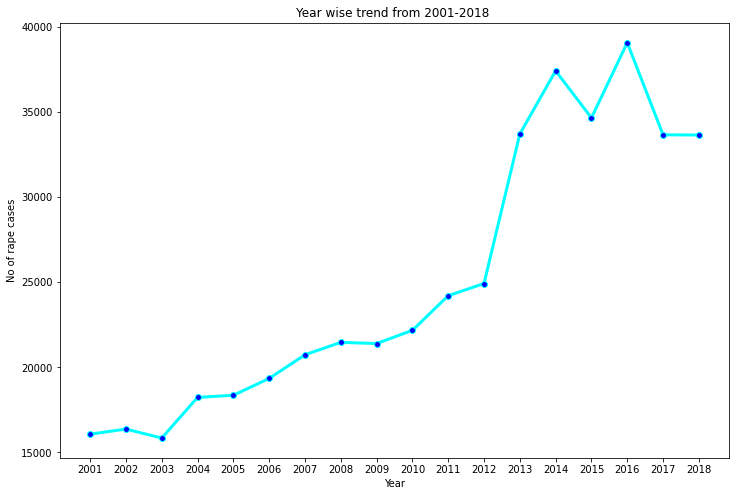

In [370]:

data.groupby('year')['total_rape'].sum().plot(kind='line',color='cyan',linewidth = 3, figsize=(12, 8),
         marker='o', markerfacecolor='blue')
plt.xlabel('Year') 
# naming the y axis 
plt.ylabel('No of rape cases') 
plt.xticks(np.arange(2001, 2019, 1))
# giving a title to my graph 
plt.title('Year wise trend from 2001-2018 ') 
plt.show()

### State wise trend in rape cases.

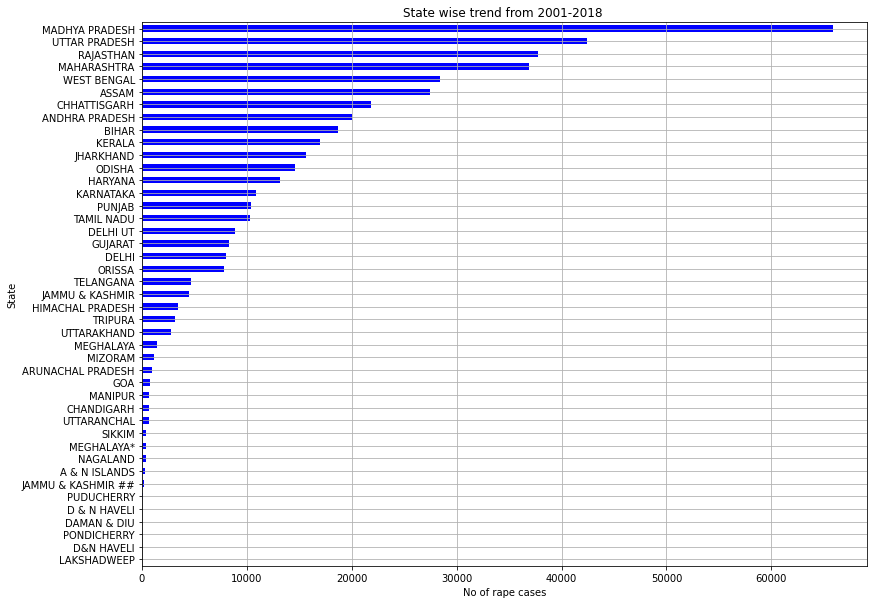

In [248]:
# grouping data state-wise
data.groupby('state_ut')['total_rape'].sum().sort_values().plot(kind='barh',color='blue',width=0.5,grid=True,figsize=(13, 10))

plt.xlabel('No of rape cases') 
# naming the y axis 
plt.ylabel('State') 
  
# giving a title to my graph 
plt.title('State wise trend from 2001-2018 ') 
plt.show()

### Comparison in cases in different states in past 18 years

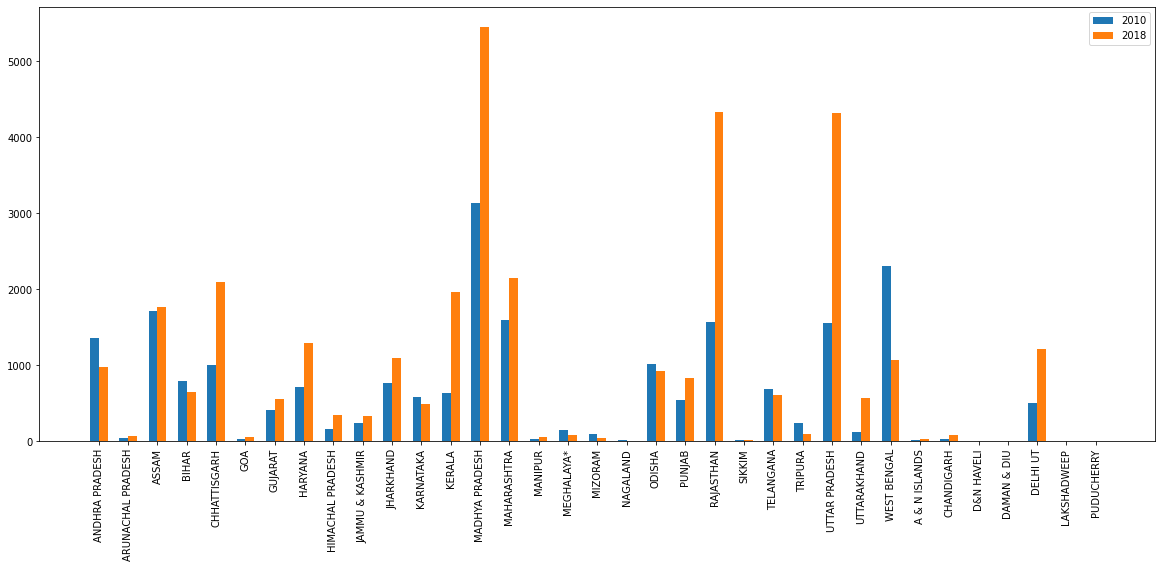

In [249]:
#increament or decreament in cases in differen states in past 18 years
#data=data.drop(data.index[550])
index = np.arange(data[data['year'] == 2010]['state_ut'].shape[0])
bar_width = 0.3
fig, ax = plt.subplots(figsize=(20,8))
summer = ax.bar(index, data[data['year'] == 2010]['total_rape'], bar_width, label="2010",)
winter = ax.bar(index+bar_width, data[data['year'] == 2018]['total_rape'],bar_width, label="2018")

ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(list(data[data['year'] == 2018]['state_ut']))
ax.autoscale_view()
ax.legend()
plt.xticks(rotation=90)
plt.show()



In [288]:
# perparing data for model prediction
df=data
df=df.drop(columns=['upto 10 years','10-14 years','14-18 years','18-30 years','30-35 years','Above 50 years','s.no'], axis=1)
print(df.head())

cat_cols=['state_ut']
for col in cat_cols:
        df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True)], axis=1)
        
df.shape


            state_ut  total_rape  year
0     ANDHRA PRADESH         871  2001
1  ARUNACHAL PRADESH          33  2001
2              ASSAM         817  2001
3              BIHAR         888  2001
4       CHHATTISGARH         959  2001


(634, 44)

### Predict future years increase in total number of cases in india in 2020

(18, 1)
[38894.84178499]


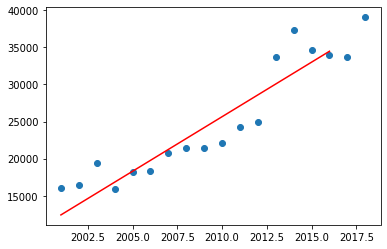

0.8629404590839872
0.9143151983189498


In [433]:

y = data.groupby('year')['total_rape'].sum()
p=df['year'].unique().reshape(-1, 1)
print(p.shape)

    #Split into train and test
X_train, X_test, y_train, y_test = train_test_split(p, y, test_size=0.1, random_state=32)

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit

#Predict using your model
input=[[2019]]
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)
    
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)
y_preds = lm_model.predict(input)

print(y_preds)

plt.scatter(p, y)
plt.plot(X_test, y_test_preds, color='red')
plt.show()
print(train_score)
print(test_score)


### Predict future years increase in cases and plot for particular states

(13, 1)
[1354.3364486]


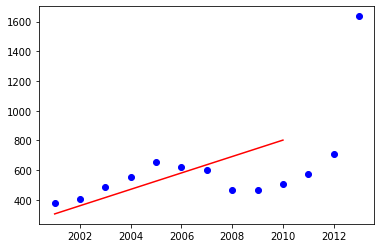

0.3612736602032016
-10.711816300898082
(18, 1)
[5494.84043272]
(18, 1)
[4383.92258283]
(18, 1)
[3112.51453685]


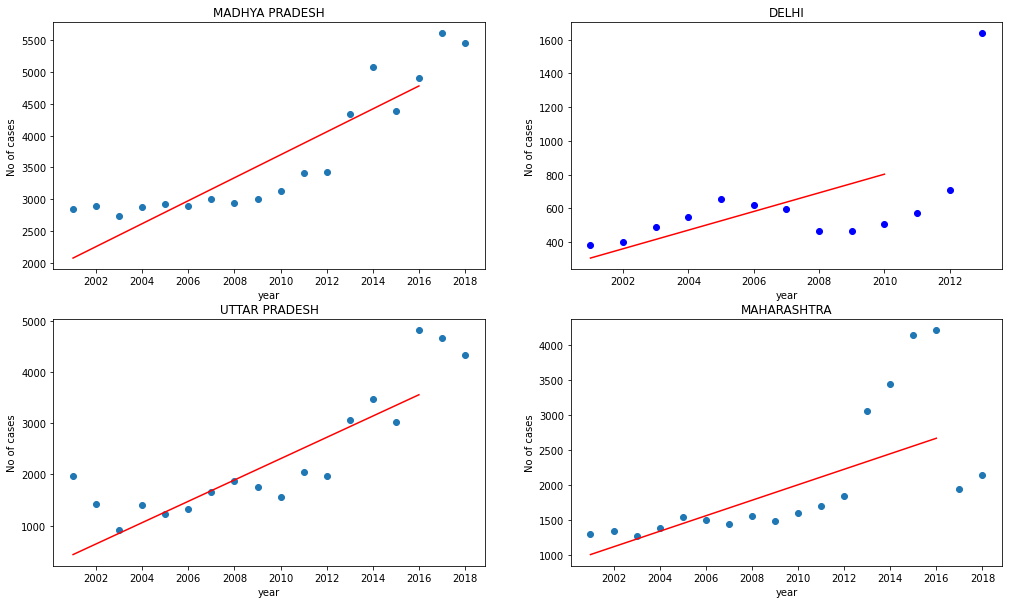

In [434]:

y = data[ data['state_ut']=='DELHI']['total_rape']
p=np.array(data[data['state_ut']=='DELHI']['year']).reshape(-1, 1)
print(p.shape)


#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(p, y, test_size=0.1, random_state=32)

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit

#Predict using your model
input=[[2020]]
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)
    
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)
y_preds = lm_model.predict(input)
print(y_preds)

plt.scatter(p, y,color="blue")
plt.plot(X_test, y_test_preds, color='red')
plt.show()
print(train_score)
print(test_score)




y1 = data[data['state_ut']=='MADHYA PRADESH']['total_rape']
p1=np.array(data[data['state_ut']=='MADHYA PRADESH']['year']).reshape(-1, 1)
print(p1.shape)

#Split into train and test
X_train1, X_test1, y_train1, y_test1 = train_test_split(p1, y1, test_size=0.1, random_state=32)

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train1, y_train1) #Fit

#Predict using your model
input=[[2020]]
y_test_preds1 = lm_model.predict(X_test1)
y_train_preds1 = lm_model.predict(X_train1)
    
test_score1 = r2_score(y_test1, y_test_preds1)
train_score1 = r2_score(y_train1, y_train_preds1)
y_preds1 = lm_model.predict(input)
print(y_preds1)



y2 = data[data['state_ut']=='UTTAR PRADESH']['total_rape']
p2=np.array(data[data['state_ut']=='UTTAR PRADESH']['year']).reshape(-1, 1)
print(p2.shape)

#Split into train and test
X_train2, X_test2, y_train2, y_test2 = train_test_split(p2, y2, test_size=0.1, random_state=32)

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train2, y_train2) #Fit

#Predict using your model
input=[[2020]]
y_test_preds2 = lm_model.predict(X_test2)
y_train_preds2 = lm_model.predict(X_train2)
    
test_score2 = r2_score(y_test1, y_test_preds2)
train_score2 = r2_score(y_train1, y_train_preds2)
y_preds2 = lm_model.predict(input)
print(y_preds2)




y3 = data[data['state_ut']=='MAHARASHTRA']['total_rape']
p3=np.array(data[data['state_ut']=='MAHARASHTRA']['year']).reshape(-1, 1)
print(p3.shape)

#Split into train and test
X_train3, X_test3, y_train3, y_test3 = train_test_split(p3, y3, test_size=0.1, random_state=32)

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train3, y_train3) #Fit

#Predict using your model
input=[[2020]]
y_test_preds3 = lm_model.predict(X_test3)
y_train_preds3 = lm_model.predict(X_train3)
    
test_score2 = r2_score(y_test1, y_test_preds3)
train_score2 = r2_score(y_train1, y_train_preds3)
y_preds3 = lm_model.predict(input)
print(y_preds3)

fig, axs = plt.subplots(2, 2,figsize=(17,10))
plt.setp(axs, xticks=[2002,2004,2006,2008,2010,2012,2014,2016,2018])
axs[0, 1].scatter(p, y,color="blue")
axs[0, 1].plot(X_test, y_test_preds, color='red')
axs[0, 1].set_title('DELHI')

axs[0, 0].scatter(p1, y1)
axs[0, 0].plot(X_test1, y_test_preds1, color='red')
axs[0, 0].set_title('MADHYA PRADESH')
axs[1, 0].scatter(p2, y2)
axs[1, 0].plot(X_test2, y_test_preds2, color='red')
axs[1, 0].set_title('UTTAR PRADESH')
axs[1, 1].scatter(p3, y3)
axs[1, 1].plot(X_test3, y_test_preds3, color='red')
axs[1, 1].set_title('MAHARASHTRA')

for ax in axs.flat:
    ax.set(xlabel='year', ylabel='No of cases') 

